# UAVSAR

:::{figure-md} sthelens
<img src="../../img/uavsar/sthelens.jpeg" alt="uavsar scene" width="800px">

Uavsar polarimetry imagery of Mt. St Helens. Source: Jones et al. 2008
:::

```{admonition} Learning Objectives
**Learning Objectives**
- What is UAVSAR?
- Why would I use UAVSAR?
- How can I access UAVSAR imagery?
- What are the UAVSAR data products?
- UAVSAR Snow water equivalent inversion
```

*Developers: \
Jack Tarricone, University of Nevada, Reno \
Zach Keskinen, Boise State University*

*Other contributors: \
Ross Palomaki, Montana State University\
Naheem Adebisi, Boise State University*

## What is UAVSAR?

[UAVSAR](https://uavsar.jpl.nasa.gov/education/what-is-uavsar.html) is a low frequency plane-based synthetic aperature radar. UAVSAR stands for "Uninhabited Aerial Vehicle Synthetic Aperature Radar". It captures imagery using a L-band radar. This low frequency means it can penetrate into and through clouds, vegetation, and snow.

| frequency (cm) | resolution (rng x azi m) | Swath Width (km) | Polarizations | Launch date |
| - | - | - | - | - |
| L-band 23| 1.8 x 5.5 | 16 | VV, VH, HV, HH | 2007 |

### NASA SnowEx 2020 and 2021 UAVSAR Campaings

During the winter of 2020 and 2021, NASA conducted an L-band InSAR timeseries across the Western US with the goal of tracking changes in SWE. Field teams in 13 different locations in 2020, and in 6 locations in 2021, deployed on the date of the flight to perform calibration and validation observations.

:::{figure-md} UAVSAR-map
<img src="../../img/SnowEx_map.jpg" alt="uavsar map" width="800px">

Map of the UAVSAR flight locations for NASA SnowEx. Note that the Montana site (Central Agricultral Research Center) is not on this map. Source: Chris Hiemstra
:::

---

The site locations from the above map along with the [Uavsar defined campaign name](https://api.daac.asf.alaska.edu/services/utils/mission_list) and currently processed pairs of InSAR images for each site. Note that the image pair count may contain multiple versions of the same image and may increase as more pairs of images are processed by JPL. Also note that the Lowman campaign name is the wrong state when searching.

| Site Location | Campaign Name | Image Pairs |
| - | - | - |
| Grand Mesa | Grand Mesa, CO | 13 |
| Boise River Basin | Lowman, CO | 17 |
| Frazier Experimental Forest | Fraser, CO | 16 |
| Senator Beck Basin | Ironton, CO | 9 |
| East River | Peeler Peak, CO | 4 |
| Cameron Pass | Rocky Mountains NP, CO | 15 |
| Reynold Creek | Silver City, ID | 1 |
| Central Agricultral Research Center | Utica, MT | 2 |
| Little Cottonwoody Canyon | Salt Lake City, UT | 21 |
| Jemez River | Los Alamos, NM | 3 |
| American River Basin | Eldorado National Forest, CA | 4 |
| Sagehen Creek | Donner Memorial State Park, CA | 4 |
| Lakes Basin | Sierra National Forest, CA | 3 |

## Why would I use Uavsar for snow?

L-band radar imagery penetrates through the snowpack. However when it crosses into the snowpack from the air it refracts at an angle, similar to light entering water. This refraction leads to a phase shift relative to an image with no or less snow. Using this difference in phase between two images we can calculate the change in snow height between flights using:

$$
\Delta d = - \frac{\Delta \phi \lambda}{4 \pi} \frac{1}{\cos^{ } \alpha - \sqrt{\epsilon_{s} - \sin^{2} \alpha}}
$$

Where $\Delta$ d is the change in snow height, $\Delta \phi$ is the phase shift between two SAR images, $\lambda$ is the energy wavelength, $\alpha$ is the incidence angle, and $\epsilon_{s}$ is the dielectric constant of snow which is dependent on the density and liquid water content.

:::{figure-md} conceptualfigure
<img src="../../img/uavsar/conceptual.png" style="background-color:white;" alt="conceptual_fig">

Conceptual diagram of radar refraction across the air-snow interface.
:::



### Uavsar Data Products

Uavsar has a variety of different type of images:

[Repeat Pass Interferometric](https://uavsar.jpl.nasa.gov/science/documents/rpi-format.html) images contain:
```{admonition} InSAR Data Types
:class: InSAR Data Types
- ANN file (.ann): a text annotation file with metadata
- AMP files (.amp1 and .amp2): amplitude products for flight 1 and flight 2
- COR files (.cor): coherence a measure of the noise level of the phase
- INT files (.int): wrapped phase difference between the two images
- UNW files (.unw): unwrapped phase difference between the two images
- INC files (.inc): incidence angle in radians
- HGT file  (.hgt): the DEM that was used in the InSAR processing
```

[Polarimetric PolSAR](https://uavsar.jpl.nasa.gov/science/documents/polsar-format.html) images contain:
- ANN file (.ann): a text annotation file with metadata
- The rest of files are all of the format XXYY, and are the phase difference between polarization XX and polarization YY. For instance HHHV is the phase difference between HH and HV polarizations.

Finally all images can be in radar slant range or projected into WGS84. Images that have already been projected to ground range will have the extension .grd appended to their file type extension. 

For instance a image of unwrapped phase that has not been georefenced would end with .unw, while one that was georeferenced would end with .unw.grd. You will generally want to use .grd files.
- GRD files (.grd): products projected to the ground in geographic coordinates (latitude, longitude)


## Accessing Uavsar Images

Uavsar imagery can be downloaded from both the [JPL](https://uavsar.jpl.nasa.gov/cgi-bin/data.pl) and [Alaska Satellite Facility](https://search.asf.alaska.edu/#/?dataset=UAVSAR). However both provide the imagery in a binary format that is not readily usable or readable by GIS software or python libraries. 

[Uavsar_pytools]((https://github.com/SnowEx/uavsar_pytools)) is a python package that handles the downloading and conversion of Uavsar images to georeferenced GeoTiffs. It can download and convert either individual images - `UavsarScene` or entire collections of images - `UavsarCollection`.

### Netrc Authorization

In order to download uavsar images you will need a [netrc file](https://www.gnu.org/software/inetutils/manual/html_node/The-_002enetrc-file.html) that contains your earthdata username and password. If you need to register for a NASA earthdata account use this [link](https://urs.earthdata.nasa.gov/). A netrc file is a hidden file, it won't appear in the your file explorer, that is in your home directory and that programs can access to get the appropriate usernames and passwords. While you won't need to use this for this demonstration uavsar_pytools has a tool to create this netrc file on a local computer. You only need to create this file once and then it should be permanently stored on your computer.

In [1]:
# ## Creating .netrc file with Earthdata login information
# from uavsar_pytools.uavsar_tools import create_netrc

# # This will prompt you for your username and password and save this
# # information into a .netrc file in your home directory. You only need to run
# # this command once per computer. Then it will be saved.
# create_netrc()

### Downloading and converting a single Uavsar interferogram scene

You can find urls for Uavsar images at the [ASF vertex website](https://search.asf.alaska.edu/#/?dataset=UAVSAR). Make sure to change the platform to Uavsar and you may also want to filter to  ground projected interferograms.

:::{figure-md} vertexexample
<img src="../../img/uavsar/vertex_example.png" alt="vertex example" width="800px">

:::


In [5]:
try:
    from uavsar_pytools import UavsarScene
except ModuleNotFoundError:
    print('Install uavsar_pytools with `pip install uavsar_pytools`')

import os
from os.path import join, basename, expanduser
from glob import glob
import numpy as np
import pandas as pd
import rasterio as rio
import rioxarray as rxa
from rasterio.plot import show
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as cx

## These will replaced by pytools import
from snowdepth_inversion import phase_from_depth, depth_from_phase

data_dir = '/Users/zachkeskinen/Documents/uavsar_tutorial'

In [2]:
## This is the directory you want to download and convert the images in.
work_dir = '/tmp/uavsar_tutorial'
work_dir = expanduser('~/Documents/uavsar_tutorial')

## This is a url you want to download. Can be obtained from vertex
url = 'https://datapool.asf.alaska.edu/INTERFEROMETRY_GRD/UA/\
lowman_23205_21009-004_21012-000_0007d_s01_L090_01_int_grd.zip'

## clean = True will delete the binary and zip files leaving only the tiffs
scene = UavsarScene(url = url, work_dir=work_dir, clean= True)

## After running url_to_tiffs() you will download the zip file, unzip the binary 
## files, and convert them to geotiffs in the directory with the scene name in
## the work directory. It also generate a .csv pandas dictionary of metadata.
scene.url_to_tiffs()

KeyboardInterrupt: 

### Downloading and converting a full Uavsar collection

If you want to download and convert an entire Uavsar collection for a larger analysis you can use `UavsarCollection`. The collection names for the SnowEx campaign are listed in the table in the introduction. The `UavsarCollection` only downloads interferometric image pairs, but will soon be able to select between InSAR pairs and PolSAR images.

In [22]:
from uavsar_pytools import UavsarCollection
## Collection name, the SnowEx Collection names are listed above. These are case 
## and space sensitive.
collection_name = 'Grand Mesa, CO'

## Directory to save collection into. This will be filled with directory with 
## scene names and tiffs inside of them.
out_dir = '/tmp/collection_ex/'

## This is optional, but you will generally want to at least limit the date
## range between 2019 and today.
date_range = ('2019-11-01', 'today')

# Keywords: to download incidence angles with each image use `inc = True`
# For only certain pols use `pols = ['VV','HV']`
collection = UavsarCollection(collection = collection_name, work_dir = out_dir, dates = date_range)

## You can use this to check how many image pairs have at least one image in
## the date range.
collection.find_urls()

## When you are ready to download all the images run:
# collection.collection_to_tiffs()
## This will take a long time and a lot of space, ~1-5 gB and 10 minutes per 
## image pair depending on which scene, so run it if you have the space and time.

INFO:uavsar_pytools.uavsar_collection:Found 13 image pairs


In [25]:
%%bash 

# Retrieve a copy of data files used in this tutorial from Zenodo.org:
# Re-running this cell will not re-download things if they already exist

# mkdir -p /tmp/tutorial-data
# cd /tmp/tutorial-data
# wget -q -nc -O data.zip https://zenodo.org/record/5504396/files/sar.zip
# unzip -q -n data.zip
# rm data.zip

## Interferometric Images

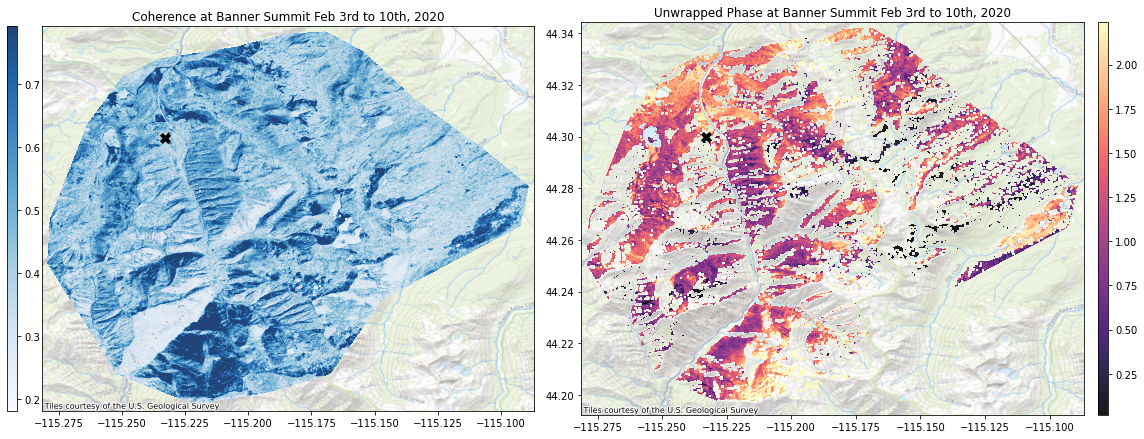

In [127]:
snotel_coords = (44.3, -115.233056)

f, axes = plt.subplots(1, 2 ,figsize = (16,12))
vis_dic = {'cor': 'Blues', 'unw':'magma'}

for i, type in enumerate(vis_dic.keys()):
    with rio.open(join(data_dir, f'{type}.tif')) as src:
        vmin, vmax = np.nanquantile(src.read(1), [0.1, 0.9])
        im = show(src, ax = axes[i], vmin = vmin, vmax = vmax, cmap = vis_dic[type], zorder = 1, alpha = 0.9)
        cx.add_basemap(axes[i], crs=src.crs, alpha = 0.8, source = cx.providers.USGS.USTopo)
    
    divider = make_axes_locatable(axes[i])
    if i == 0:
        cax = divider.append_axes('left', size='2%', pad=0.35)
        axes[i].yaxis.set_visible(False)
        axes[i].set_title('Coherence at Banner Summit Feb 3rd to 10th, 2020')
    else:
        cax = divider.append_axes('right', size='2%', pad=0.2)
        axes[i].set_title('Unwrapped Phase at Banner Summit Feb 3rd to 10th, 2020')
    
    axes[i].scatter(snotel_coords[1], snotel_coords[0], s = 70, c = 'black', marker = 'x', linewidths = 4)

    f.colorbar(im.get_images()[0], cax=cax, orientation='vertical')
    
f.tight_layout()

### Setting the zero phase point

We only have one unknown variable for our unwrapped phase. This is the "zero phase point". We will use the snotel (marked with a black x in the map above) to set this zero phase point. We need to extract two variables to calculate the phase change at the snotel site - the snow depth change and the incidence angle.

Snow Depth Change 0.381 meters with a new snow density of 140.0 kg /m3


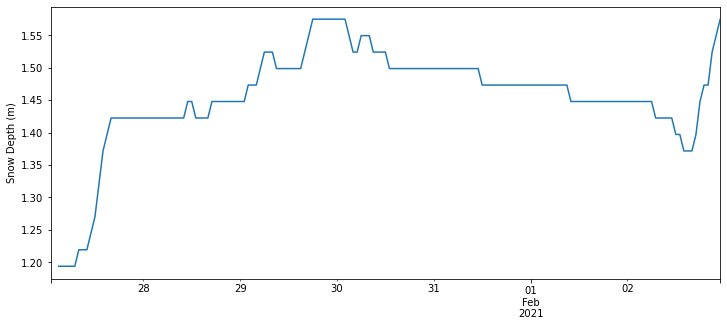

In [128]:
df = pd.read_csv(join(data_dir, 'banner_snotel_2021.csv'), parse_dates= ['datetime'], index_col = 0)

f, ax = plt.subplots(figsize = (12,5))

wx_between = df[(df.index > pd.to_datetime('2021-01-27')) & (df.index < pd.to_datetime('2021-02-03'))]
wx_between.rolling(3).median().sd.plot()
ax.set_ylabel('Snow Depth (m)')
ax.xaxis.get_label().set_visible(False)
sd_diff = wx_between.iloc[-1, 2] - wx_between.iloc[0, 2]
swe_diff = wx_between.iloc[-1, 0] - wx_between.iloc[0, 0]
new_density = np.abs(swe_diff/sd_diff*1000)
print(f'Snow Depth Change {round(sd_diff, 3)} meters with a new snow density of {round(new_density, 0)} kg /m3')

In [140]:
inc = rxa.open_rasterio(join(data_dir, '2021-02-03_2021-02-10.inc.tiff'))
phase = rxa.open_rasterio(join(data_dir, '2021-02-03_2021-02-10.unw.tiff'))
geometry = [{'type': 'Point', 'coordinates': [snotel_coords[1],snotel_coords[0]] }]
snotel_inc = float(inc.rio.clip(geometry, inc.rio.crs).mean().data)
snotel_phase = float(phase.rio.clip(geometry, phase.rio.crs).mean().data)
print(f'Snotel incidence angle {np.rad2deg(snotel_inc)} degrees, current phase: {snotel_phase}')

Snotel incidence angle 64.53051395744576 degrees, current phase: 1.7410496473312378


In [141]:
sd_corr_phase = phase_from_depth(delta_sd = sd_diff, inc_angle = snotel_inc, density = new_density)
phase_correction = sd_corr_phase - snotel_phase
phase = phase + phase_correction
swe = rxa.open_rasterio(join(data_dir, '2021-02-03_2021-02-10.unw.tiff'))
swe.data = depth_from_phase(phase.data[0], inc_angle = inc.data[0], density = new_density).reshape(phase.shape)
swe.rio.to_raster(join(data_dir, 'sd.tiff'))

No permittivity data provided -- calculating permittivity from snow density using method guneriussen2001.
No permittivity data provided -- calculating permittivity from snow density using method guneriussen2001.


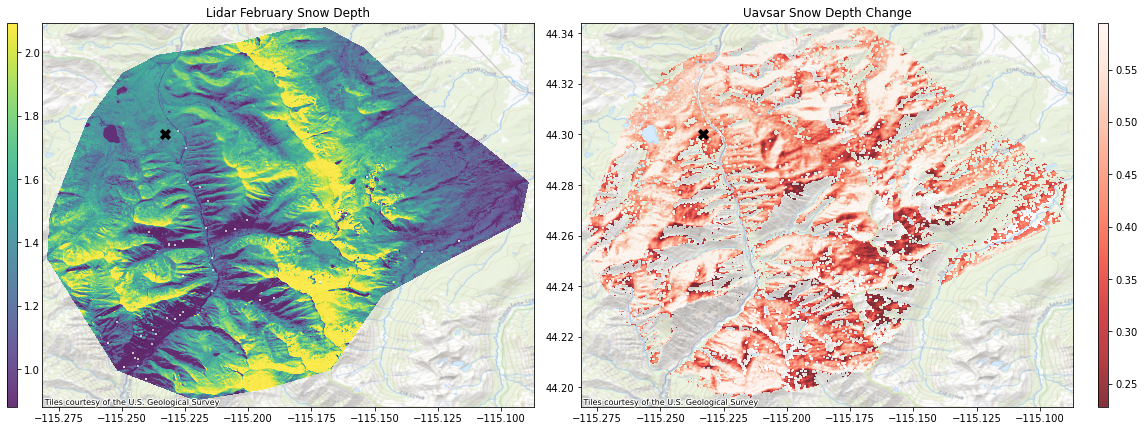

In [146]:
lidar_sd = rxa.open_rasterio(join(data_dir, 'lidar_snow_depth.tiff'))

f, axes = plt.subplots(1, 2 ,figsize = (16,12))

vis_dic = {'lidar_snow_depth': 'viridis', 'sd': 'Reds_r'}

for i, (name, cmap) in enumerate(vis_dic.items()):
    with rio.open(join(data_dir, f'{name}.tiff')) as src:
        ax = axes[i]
        vmin, vmax = np.nanquantile(src.read(1), [0.1, 0.9])
        im = show(src, ax = ax, vmin = vmin, vmax = vmax, cmap = cmap, zorder = 1, alpha = 0.8)
        divider = make_axes_locatable(ax)
        ax.scatter(snotel_coords[1], snotel_coords[0], s = 70, c = 'black', marker = 'x', linewidths = 4)
        cx.add_basemap(ax, crs=src.crs, alpha = 0.8, source = cx.providers.USGS.USTopo)
        
    if i == 1:
        cax = divider.append_axes('right', size='2%', pad=0.35)
        ax.set_title('Uavsar Snow Depth Change')

    else:
        ax.yaxis.set_visible(False)
        cax = divider.append_axes('left', size='2%', pad=0.35)
        ax.set_title('Lidar February Snow Depth')

    f.colorbar(im.get_images()[0], cax=cax, orientation='vertical')
    
f.tight_layout()